In [12]:
import pandas as pd
from lib_DMH import mapplot
import cartopy
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import shapely.geometry as sgeom
import shapely
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [7]:
county = pd.read_csv('county_tree_temp_dwp_prcp.csv', index_col=0).reset_index(drop=True)

In [93]:
county.tail()

measurement_year fips_code  species_code   latitude  longitude  \
59228            2019.0      5_87           802  35.798729 -93.771492   
59229            2019.0      5_91           131  33.153614 -93.967422   
59230            2019.0      5_91           316  33.026779 -93.994385   
59231            2019.0      5_91           611  33.153614 -93.967422   
59232            2019.0      5_91           802  33.153614 -93.967422   

       avg_height  avg_diameter  total_height  mean_temp   mean_dwp  mean_prcp  
59228   85.500000     17.190000         204.0  57.774725  49.717582   0.182088  
59229   40.804348      6.864783         641.5  64.118630  54.040274   0.143342  
59230   57.000000      5.400000          57.0  64.118630  54.040274   0.143342  
59231   37.791667      4.933333         219.0  64.118630  54.040274   0.143342  
59232   29.500000      3.472500          37.5  64.118630  54.040274   0.143342

In [94]:
county_redmaple = county.copy()
county_redmaple = county_redmaple.loc[(county_redmaple.fips_code == '5_87') & (county_redmaple.species_code ==611)]

In [95]:
county_redmaple.head()

measurement_year fips_code  species_code   latitude  longitude  \
7586             2002.0      5_87           611  35.843536 -93.739418   
10710            2003.0      5_87           611  35.854686 -93.732449   
13929            2004.0      5_87           611  35.888378 -93.687149   
20331            2006.0      5_87           611  35.831601 -93.847641   
23420            2007.0      5_87           611  35.893221 -93.636837   

       avg_height  avg_diameter  total_height  mean_temp   mean_dwp  mean_prcp  
7586    49.666667      7.066667         298.0  57.041047  47.650964   0.121791  
10710   50.450000      6.360000         303.4  57.031800  47.432264   0.092923  
13929   25.000000      3.250000          50.0  57.484341  48.883791   0.131374  
20331   50.175758      6.560000         357.0  59.132782  46.622865   0.116143  
23420   61.166667      8.782500         367.0  58.721821  47.161943   0.088573

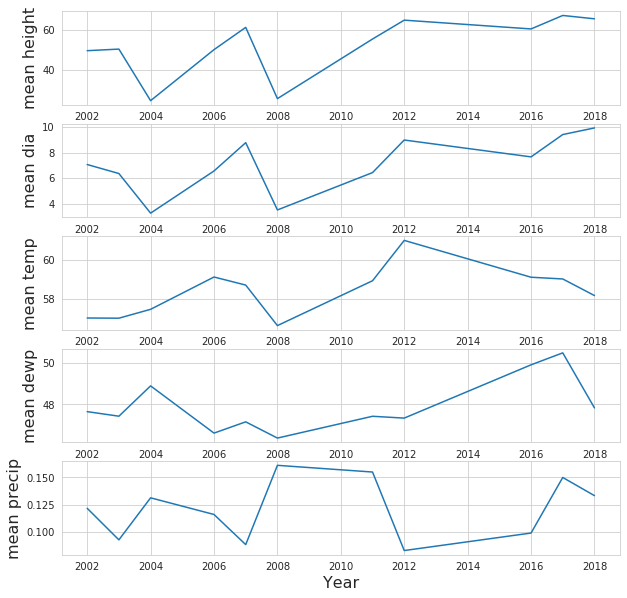

In [96]:
fig, ax = plt.subplots(5,1, figsize = (10,10))

ax[0].plot(county_redmaple.measurement_year, county_redmaple.avg_height)
ax[1].plot(county_redmaple.measurement_year, county_redmaple.avg_diameter)
ax[2].plot(county_redmaple.measurement_year, county_redmaple.mean_temp)
ax[3].plot(county_redmaple.measurement_year, county_redmaple.mean_dwp)
ax[4].plot(county_redmaple.measurement_year, county_redmaple.mean_prcp)
ax[4].set_xlabel('Year', fontsize = 16)
ax[0].set_ylabel('mean height', fontsize = 16)
ax[1].set_ylabel('mean dia', fontsize = 16)
ax[2].set_ylabel('mean temp', fontsize = 16)
ax[3].set_ylabel('mean dewp', fontsize = 16)
ax[4].set_ylabel('mean precip', fontsize = 16)

plt.show()

## There seems to be some kind of (possibly seasonal) pattern that the environmental and tree features share. 

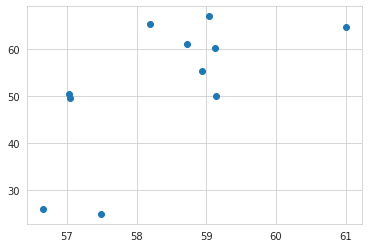

In [97]:
fig, ax = plt.subplots()
ax.scatter(county_redmaple.mean_temp, county_redmaple.avg_height)
plt.show()

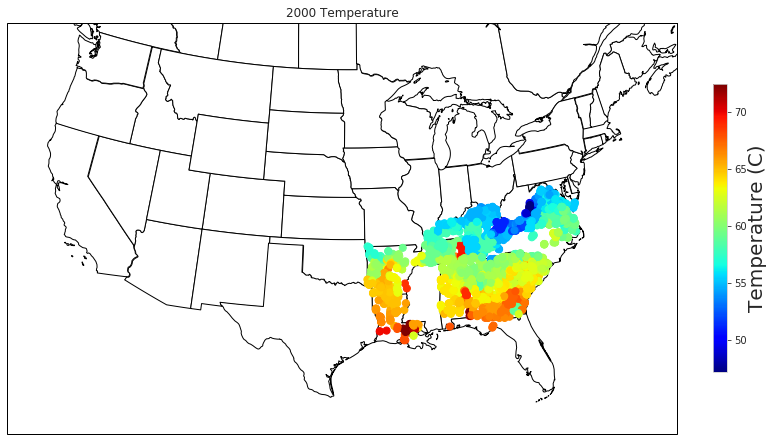

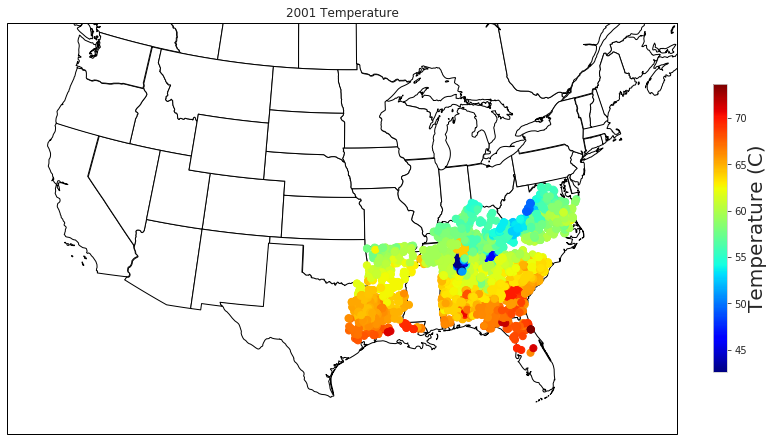

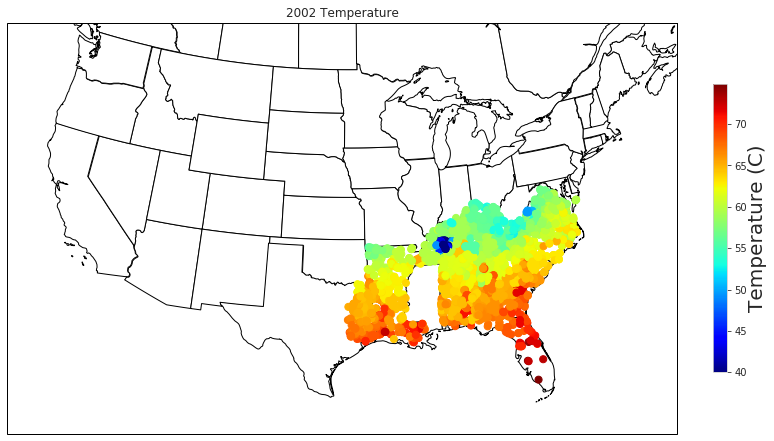

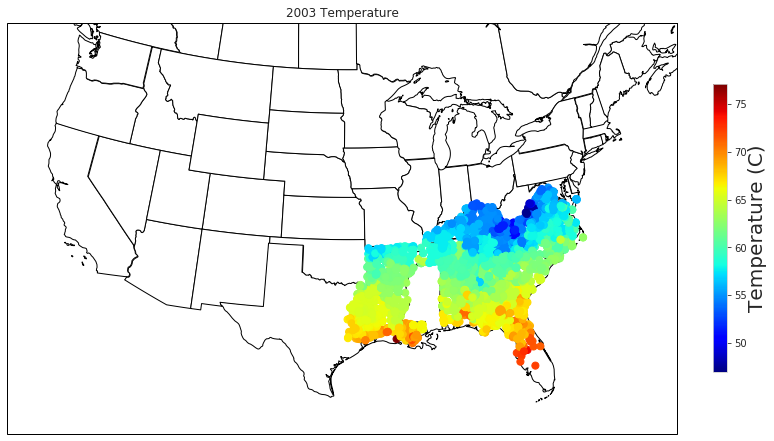

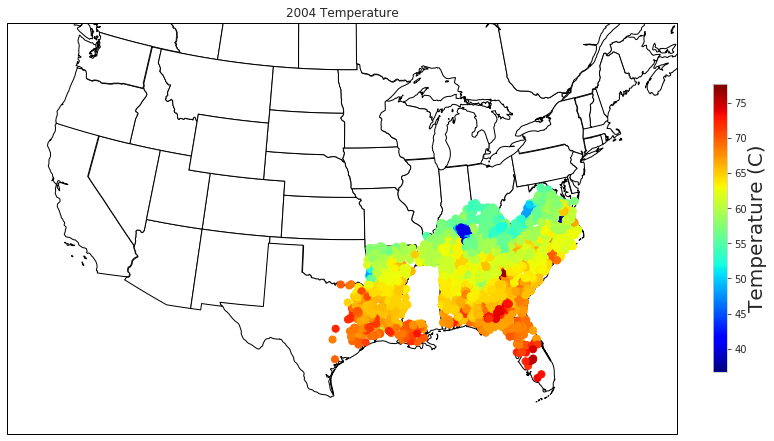

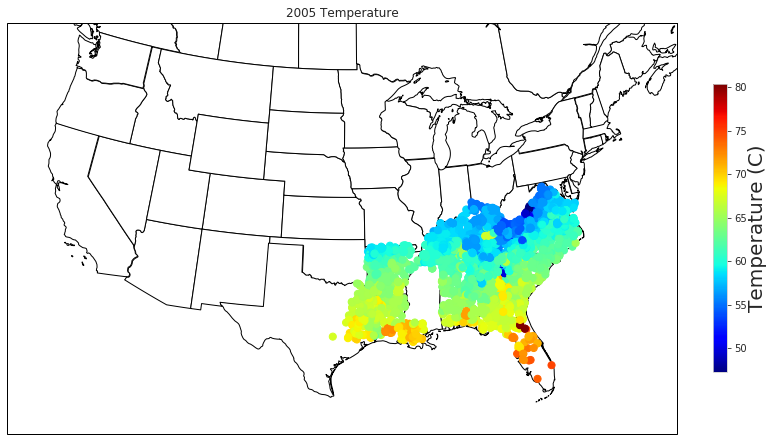

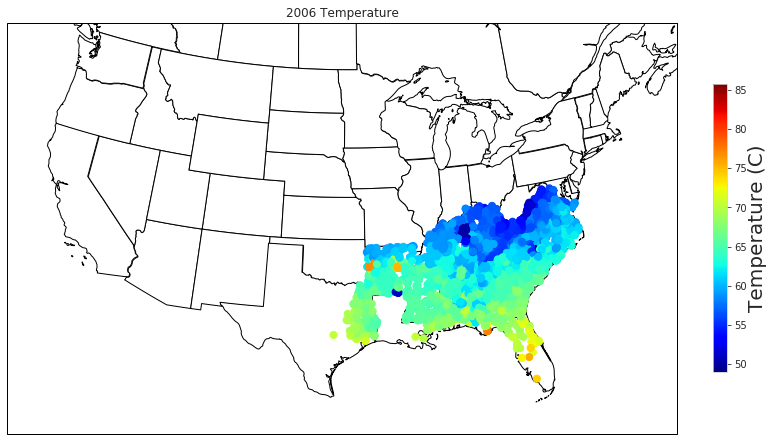

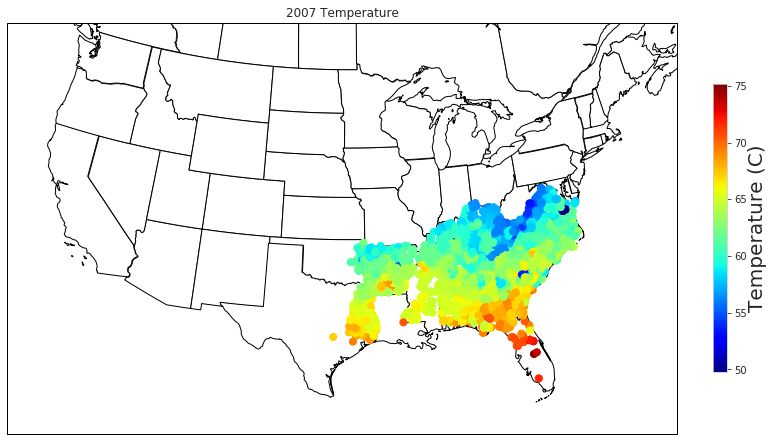

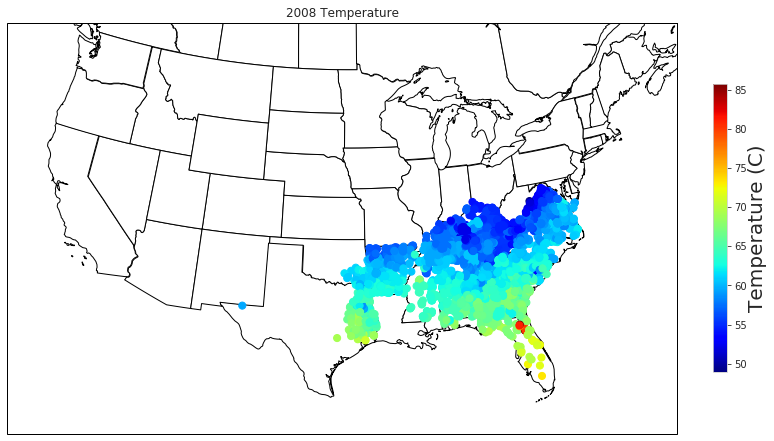

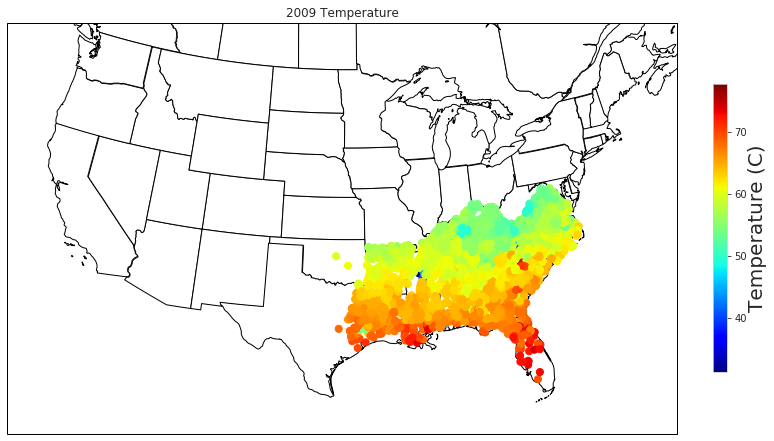

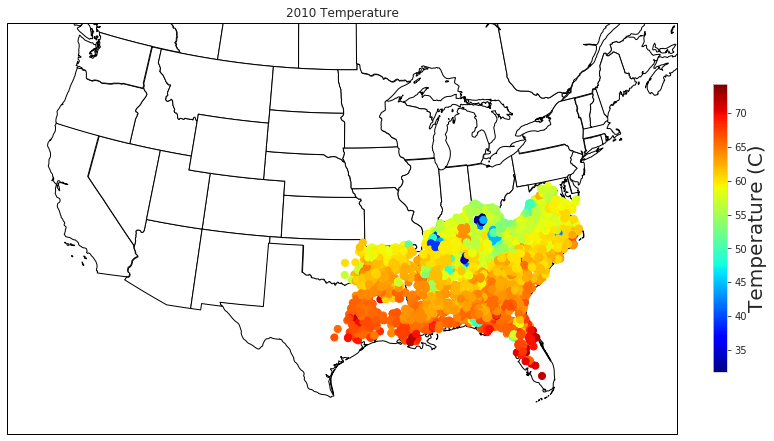

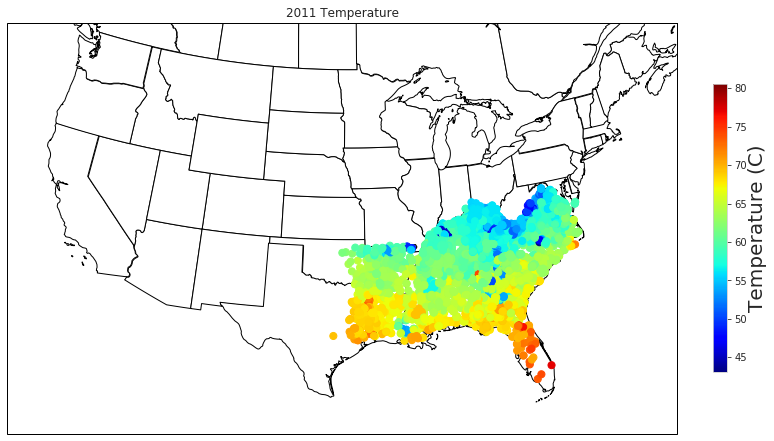

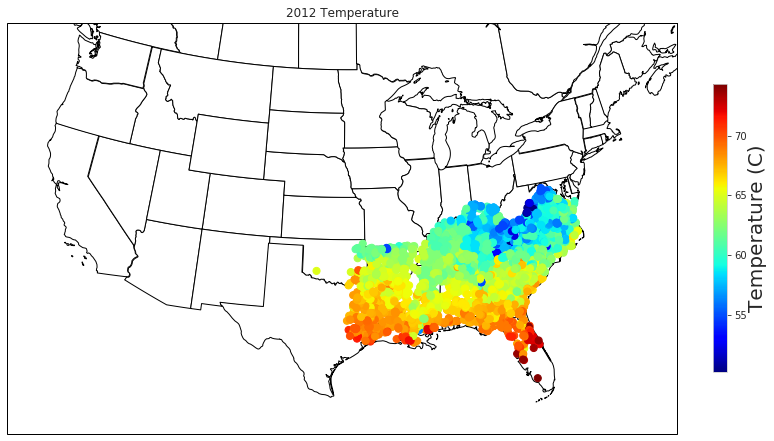

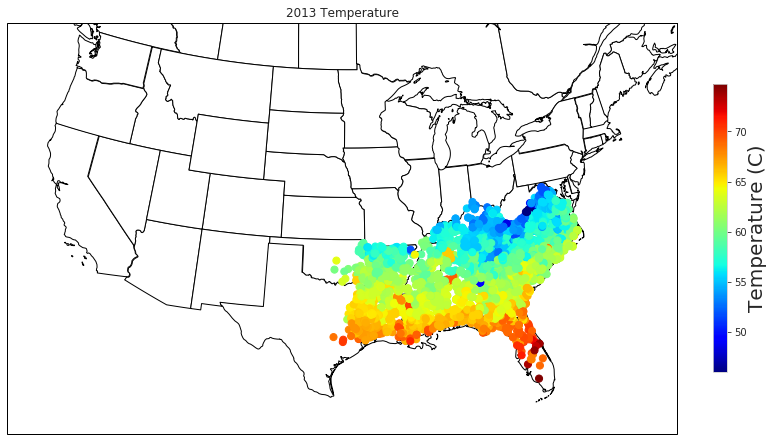

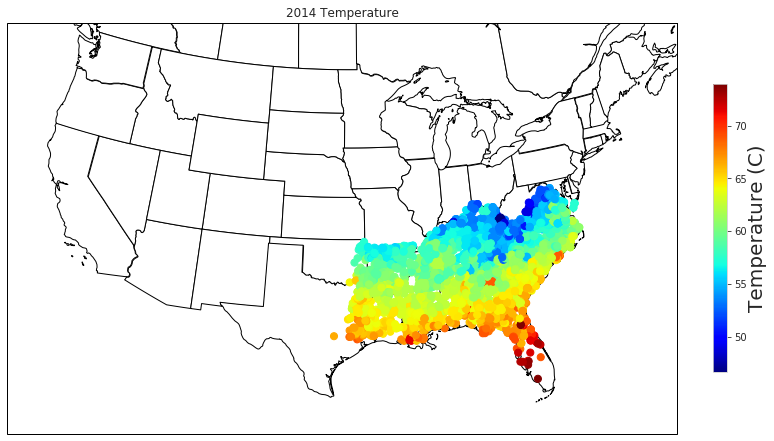

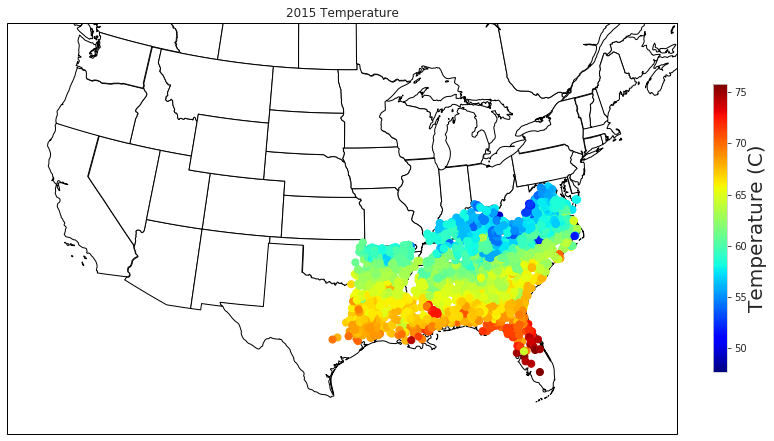

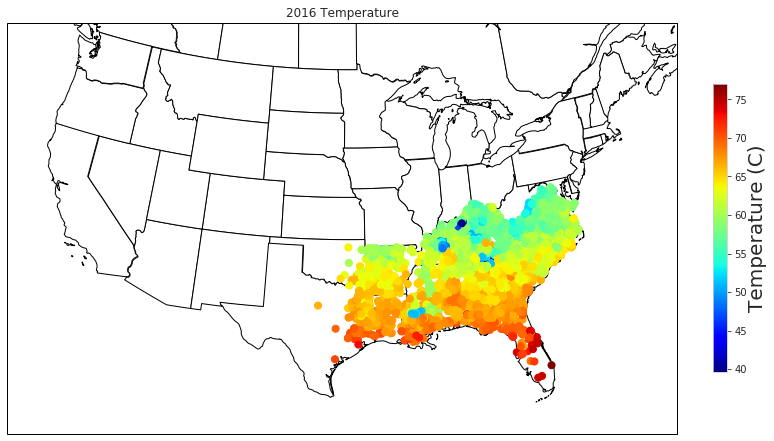

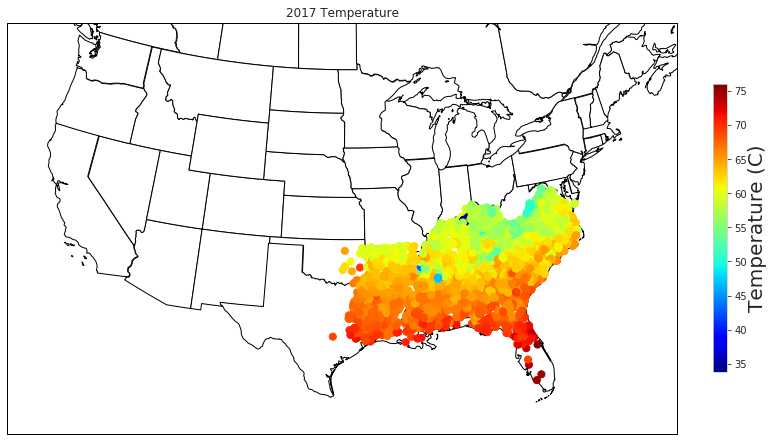

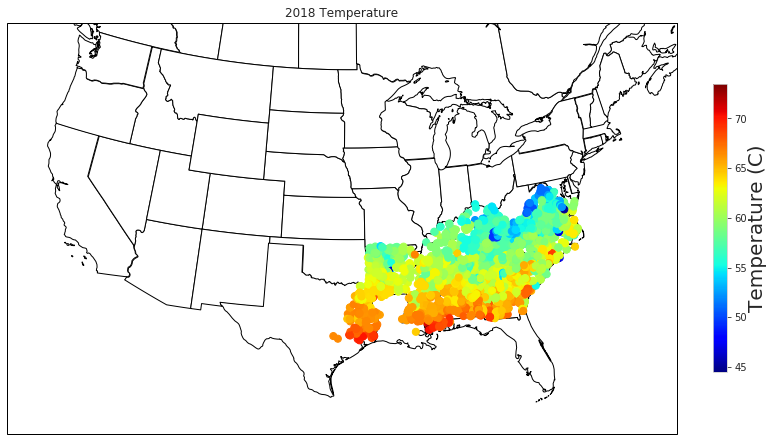

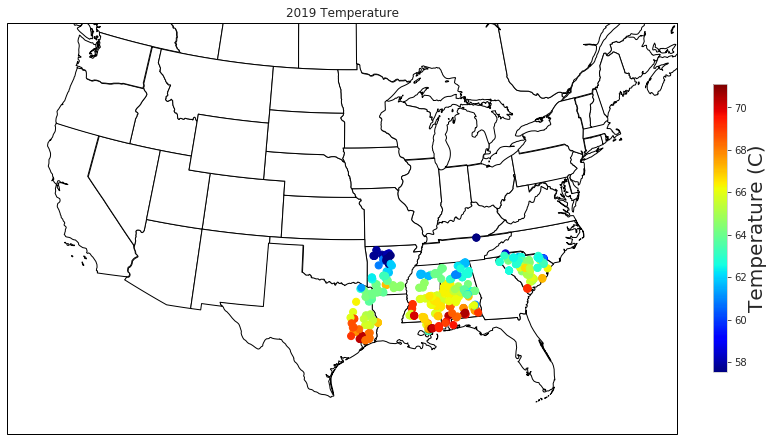

In [68]:

for i in range(20):
    mapplot()
    plt.title(str(2000+i)+' Temperature')
    county_2000 = county.loc[county.measurement_year ==2000+i]
    plt.scatter(county_2000['longitude'],county_2000['latitude'], transform=ccrs.PlateCarree(), s=50, zorder=3, c=county_2000['mean_temp'], cmap='jet')
    cbar = plt.colorbar(fraction = 0.02)
    cbar.set_label("Temperature (C)", labelpad=+1, fontsize = 20)

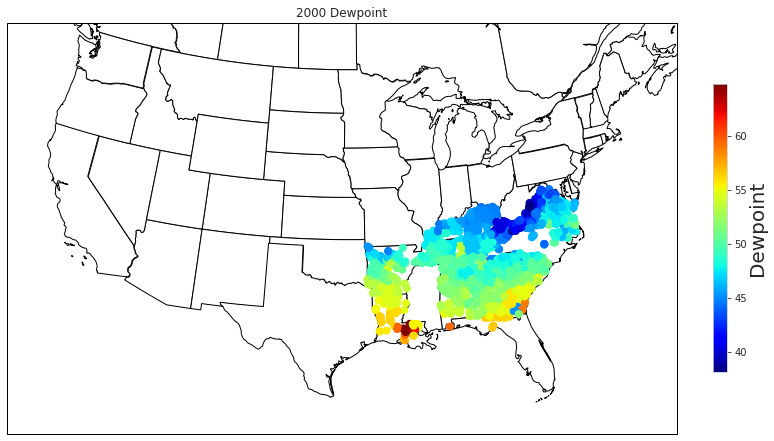

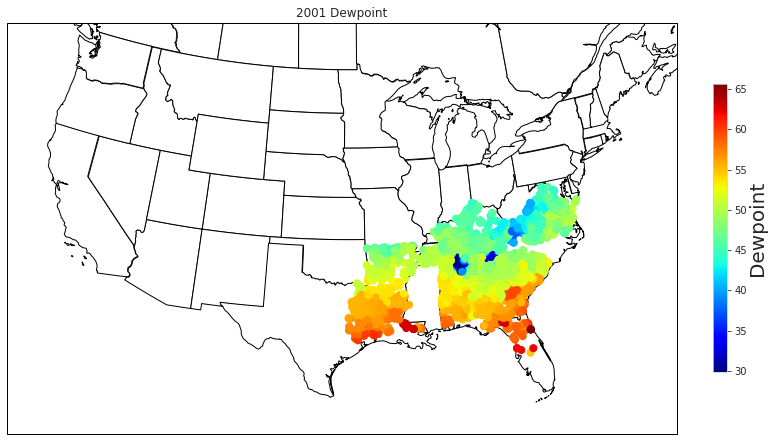

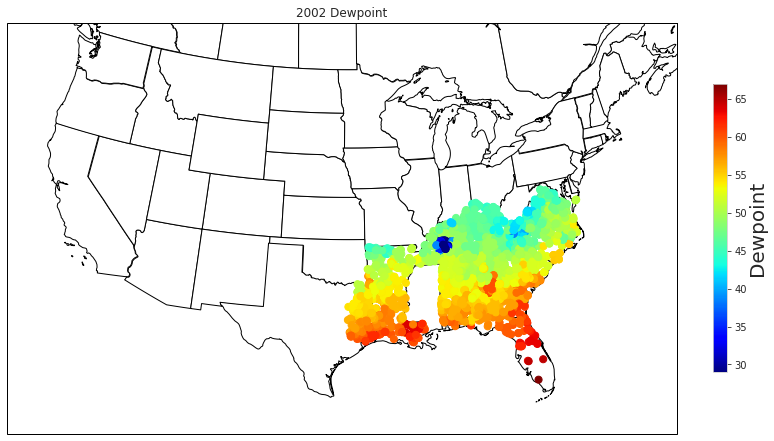

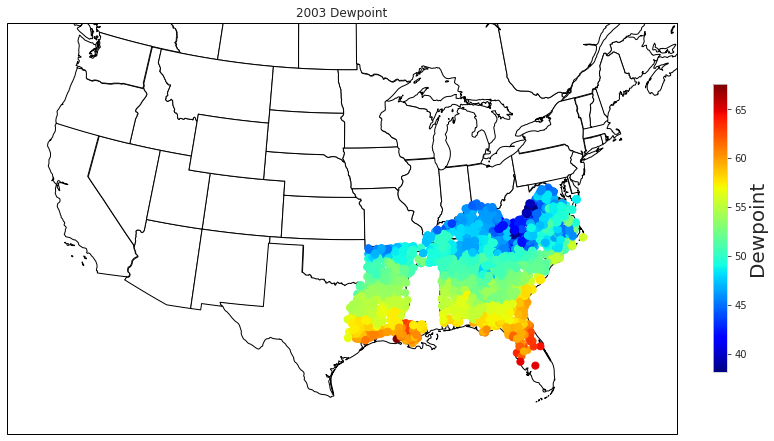

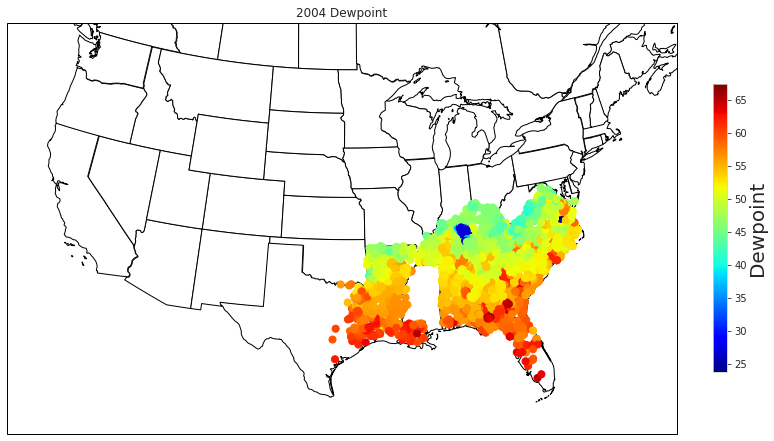

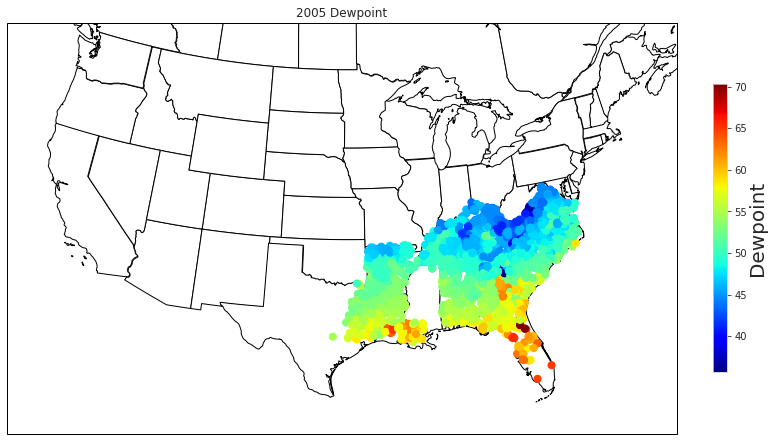

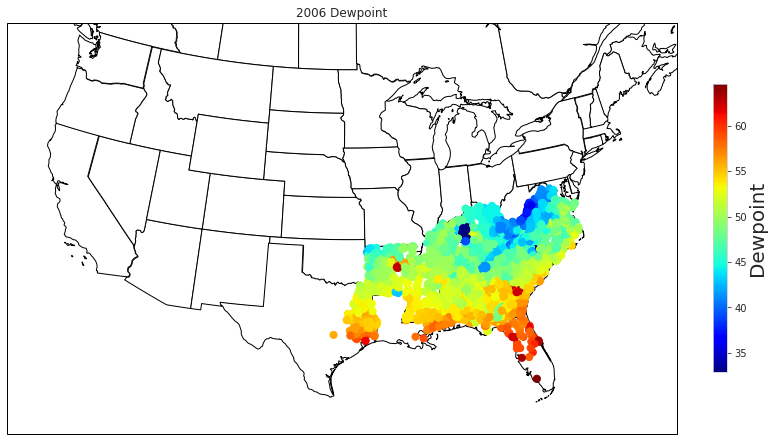

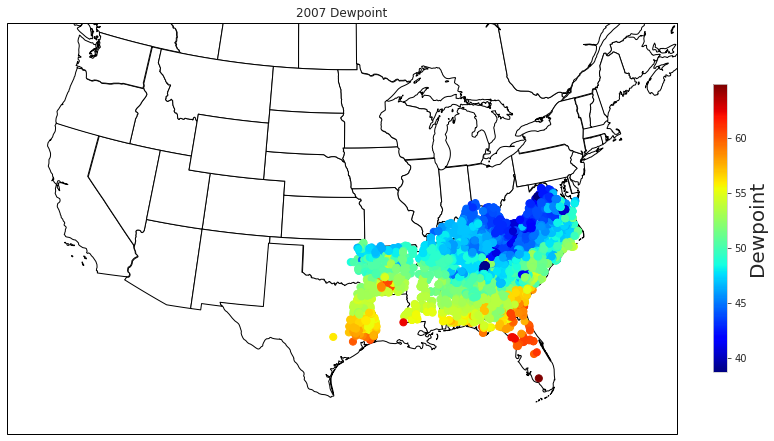

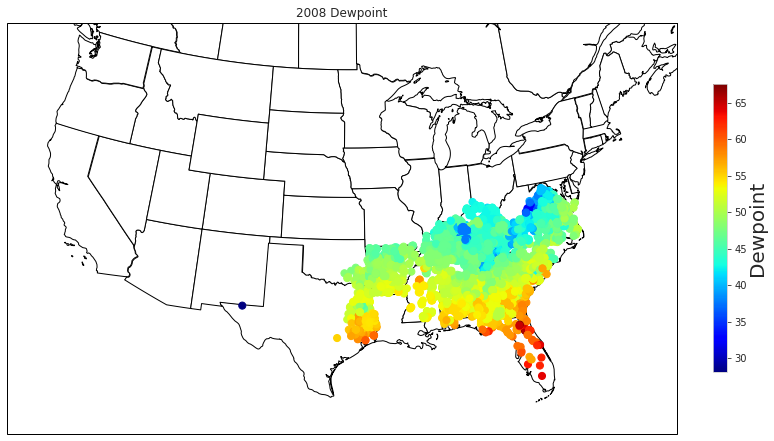

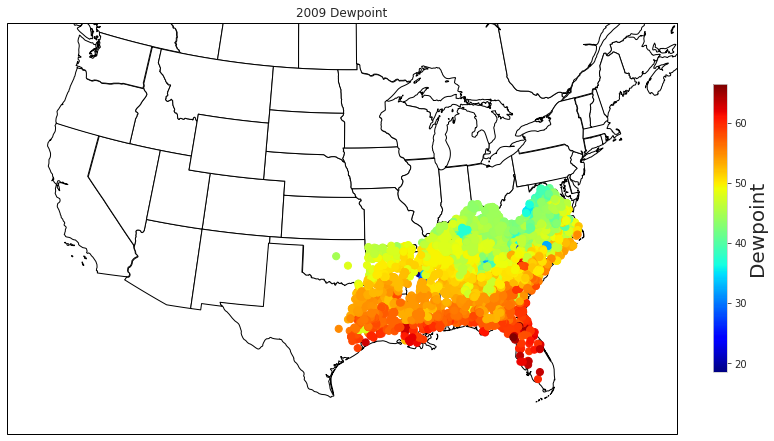

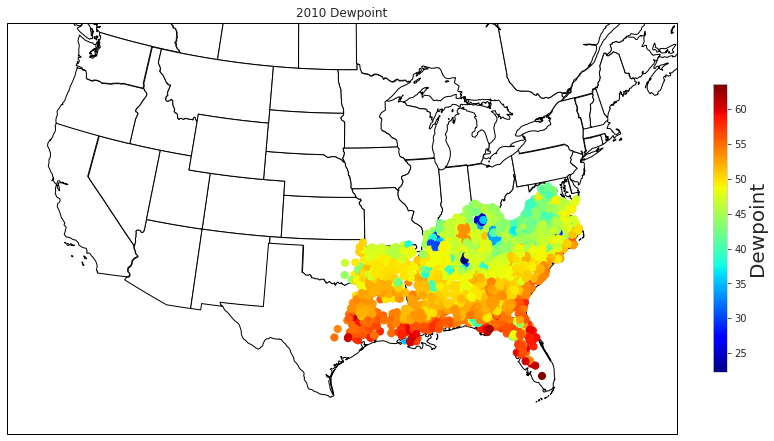

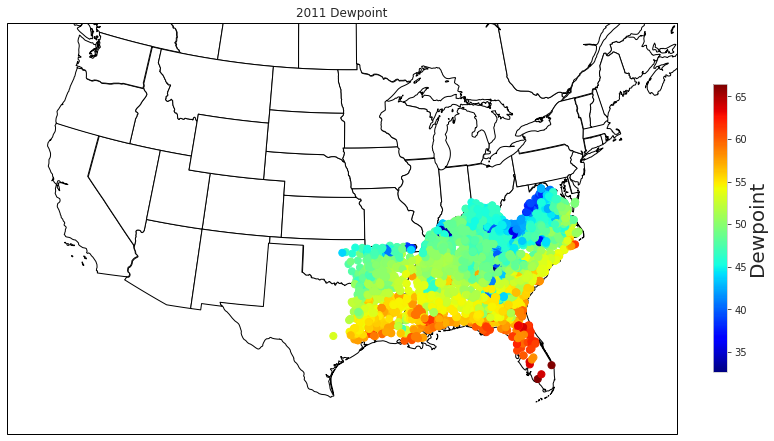

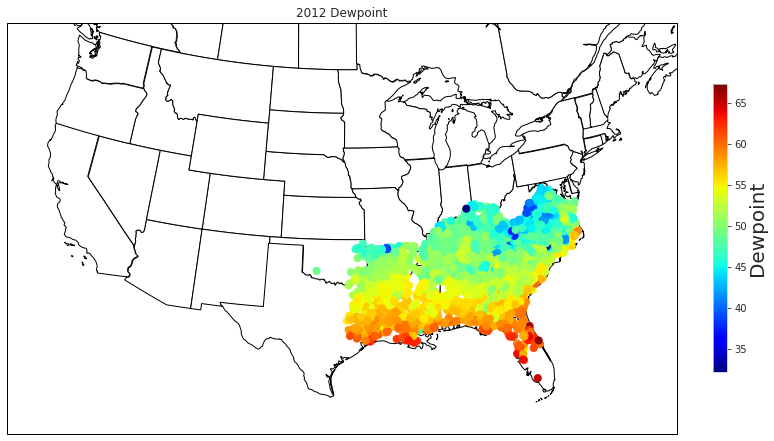

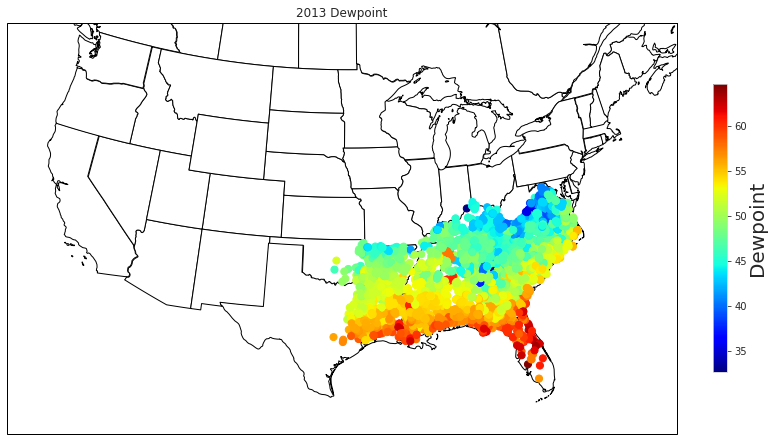

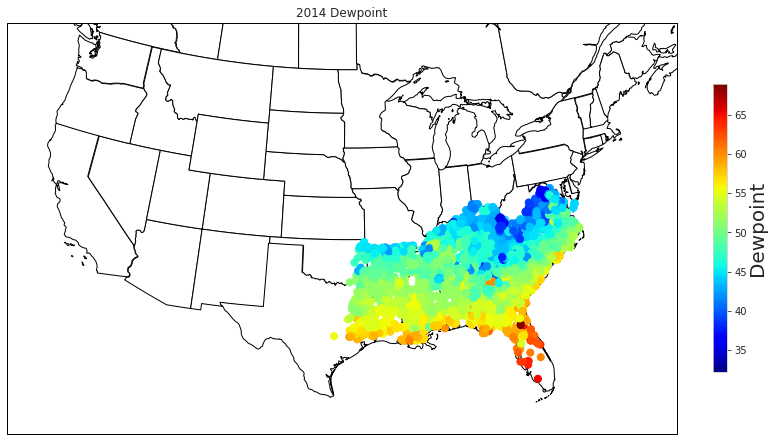

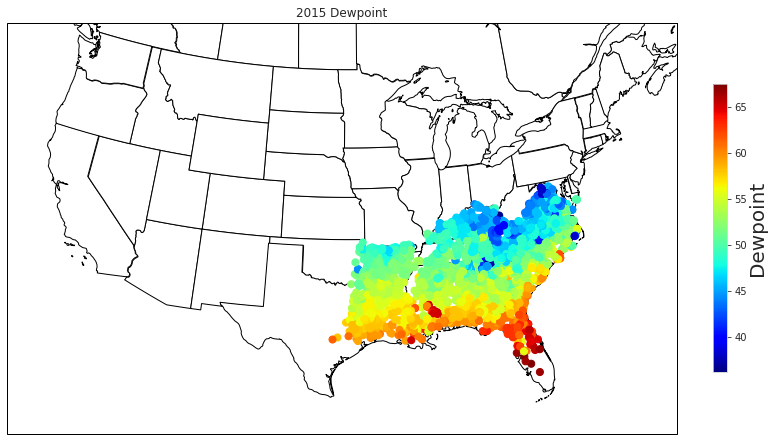

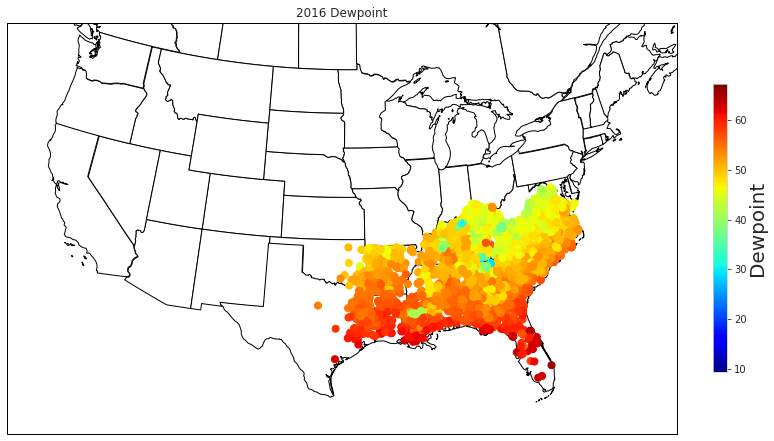

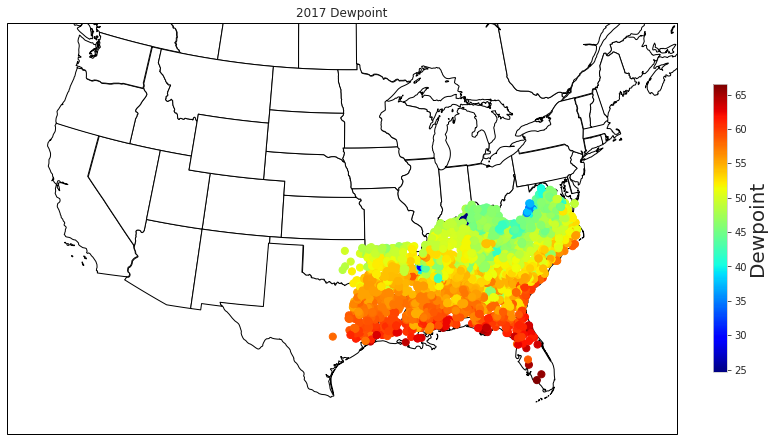

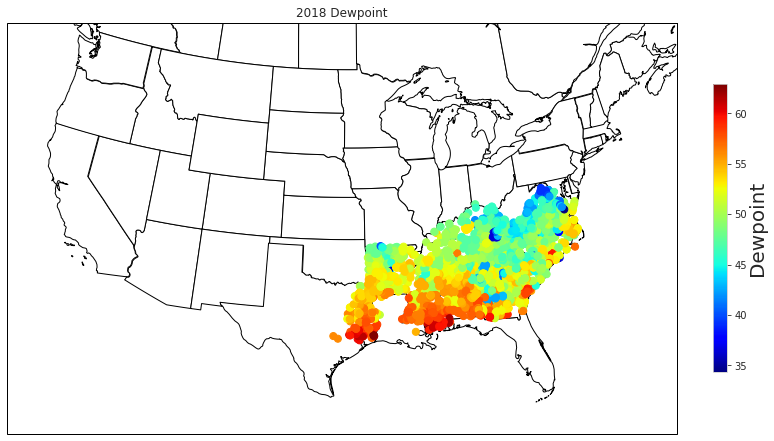

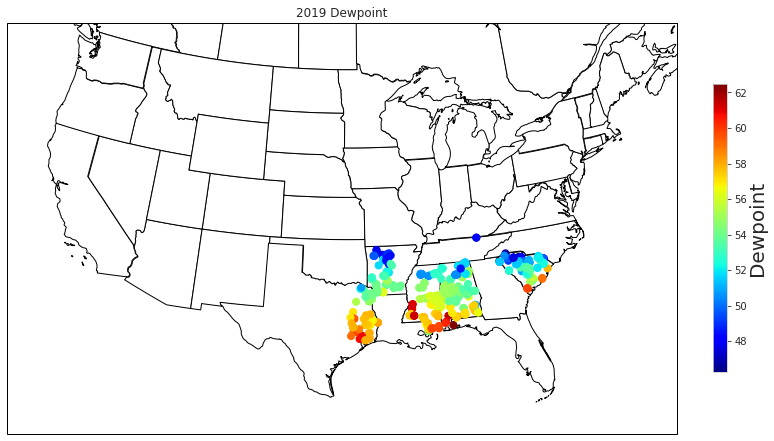

In [69]:
for i in range(20):
    mapplot()
    plt.title(str(2000+i)+' Dewpoint')
    county_2000 = county.loc[county.measurement_year ==2000+i]
    plt.scatter(county_2000['longitude'],county_2000['latitude'], transform=ccrs.PlateCarree(), s=50, zorder=3, c=county_2000['mean_dwp'], cmap='jet')
    cbar = plt.colorbar(fraction = 0.02)
    cbar.set_label("Dewpoint", labelpad=+1, fontsize = 20)

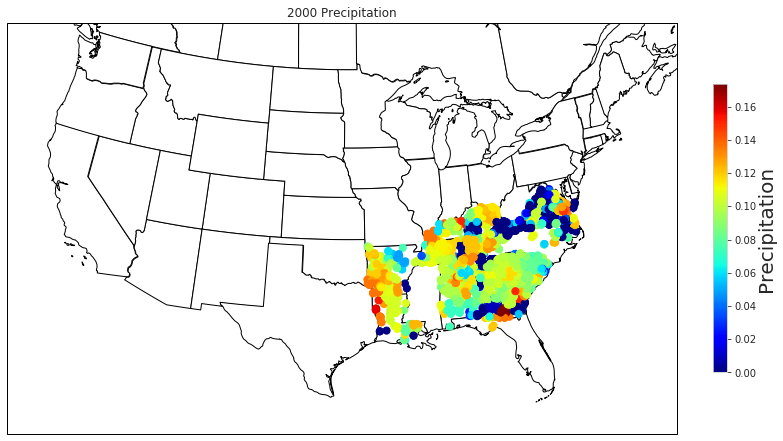

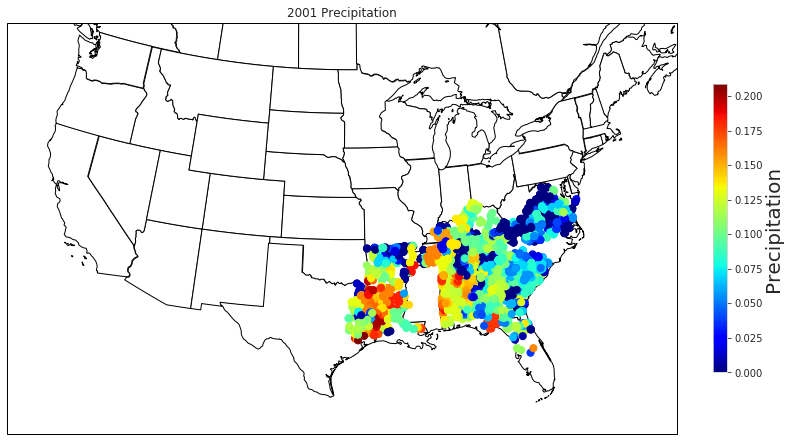

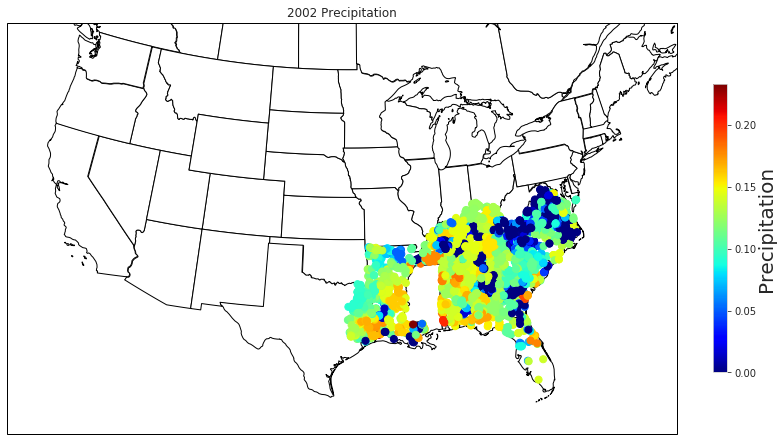

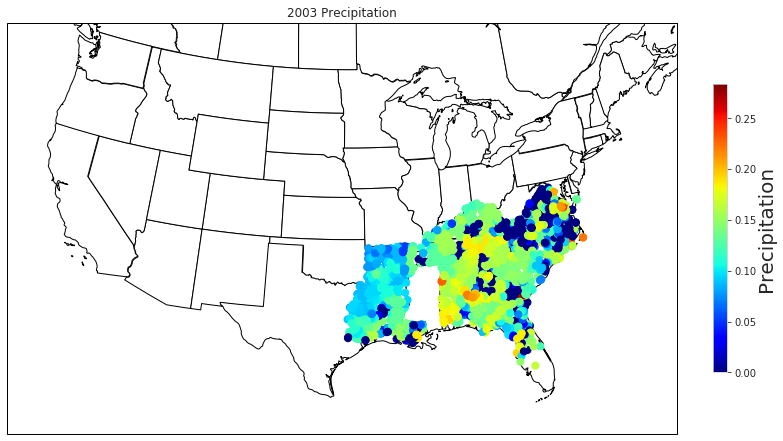

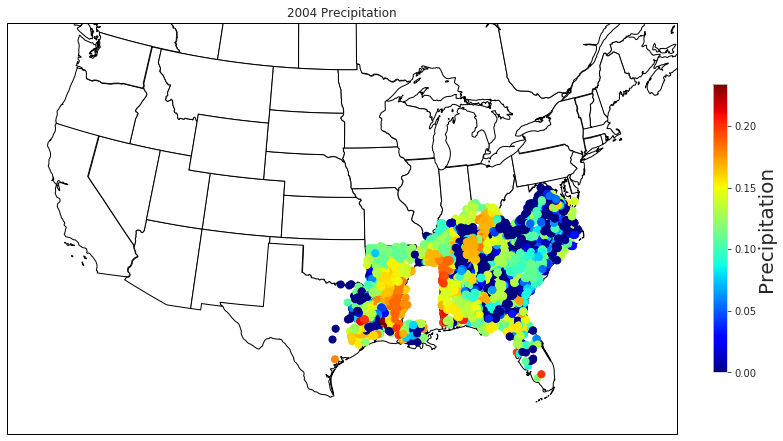

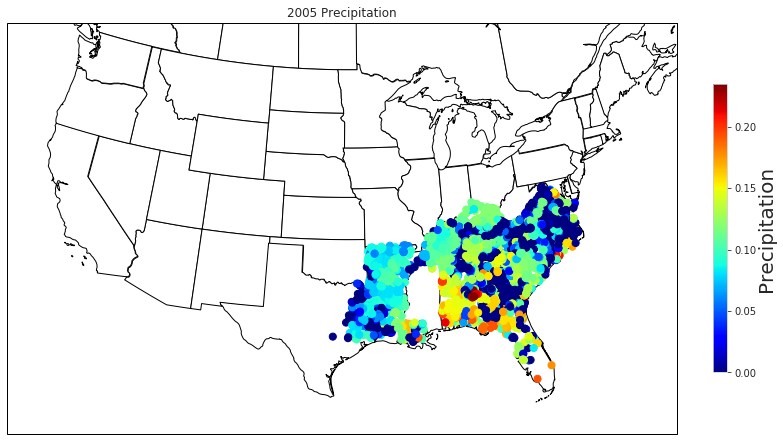

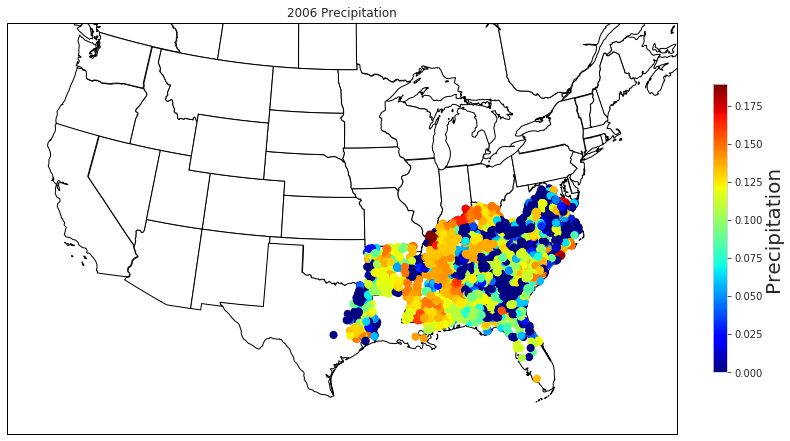

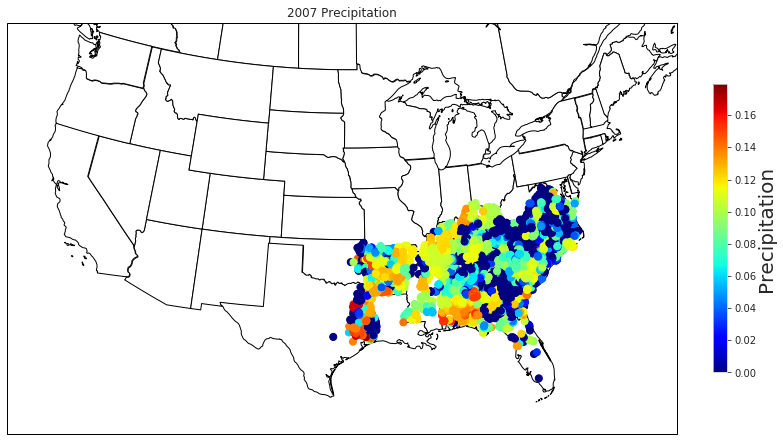

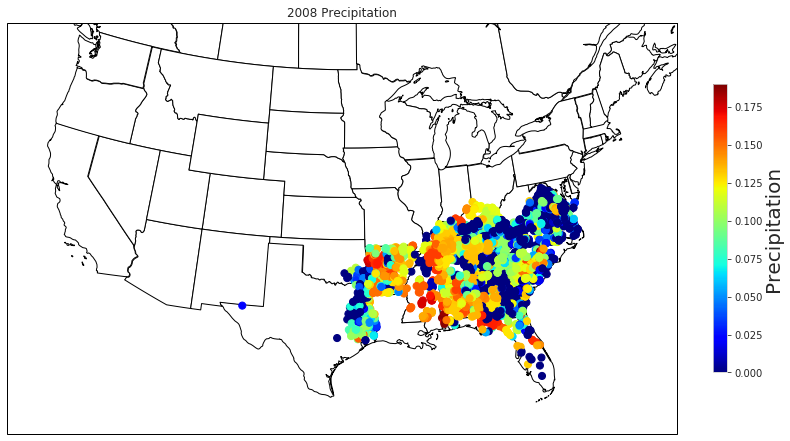

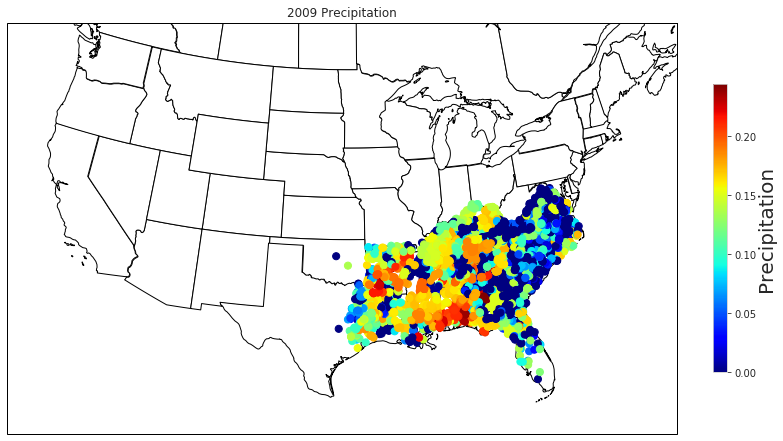

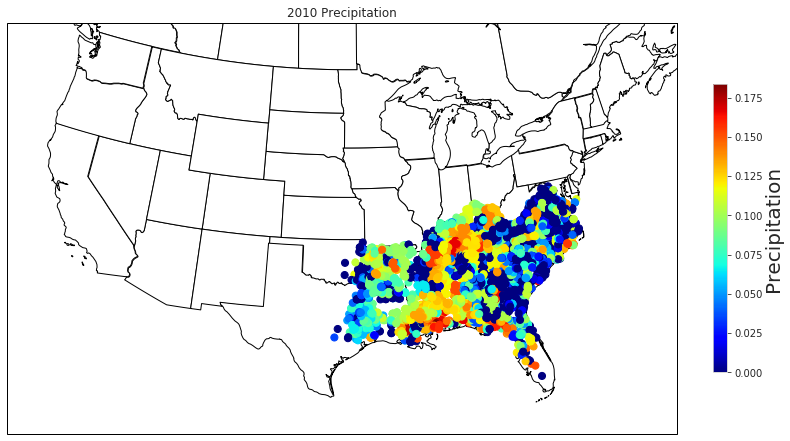

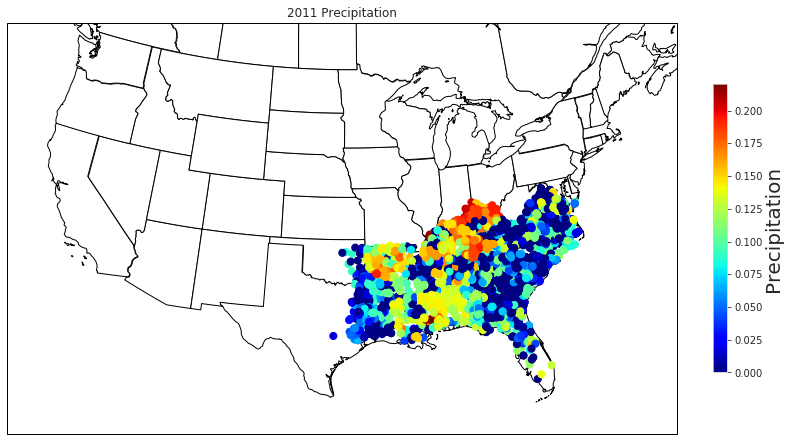

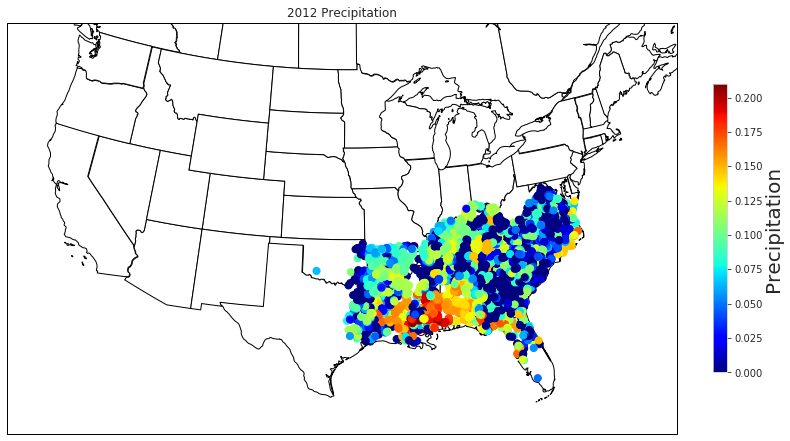

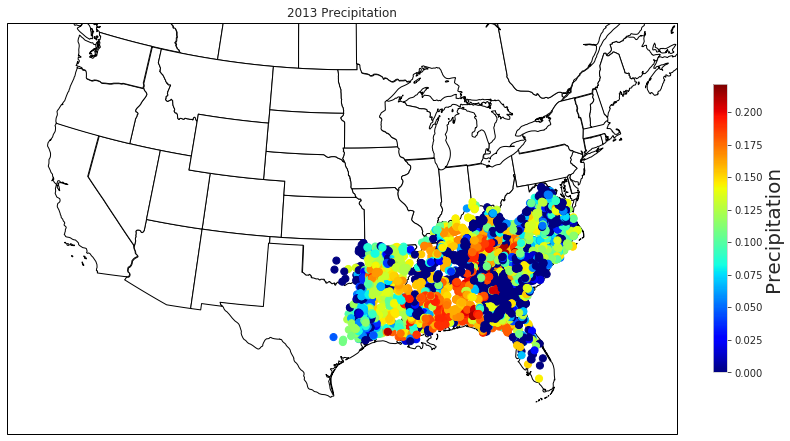

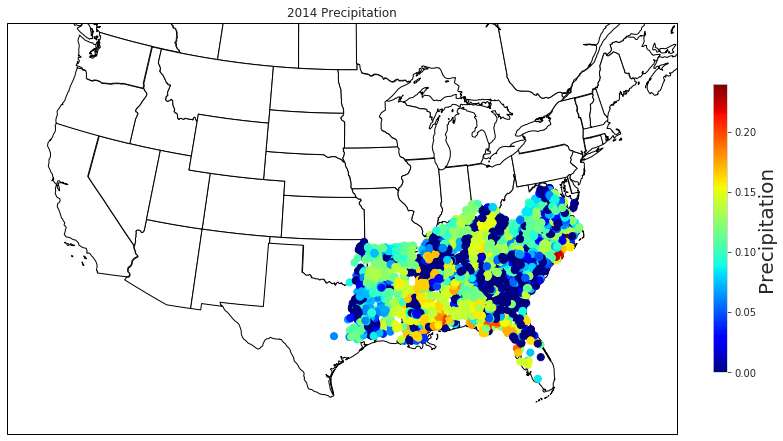

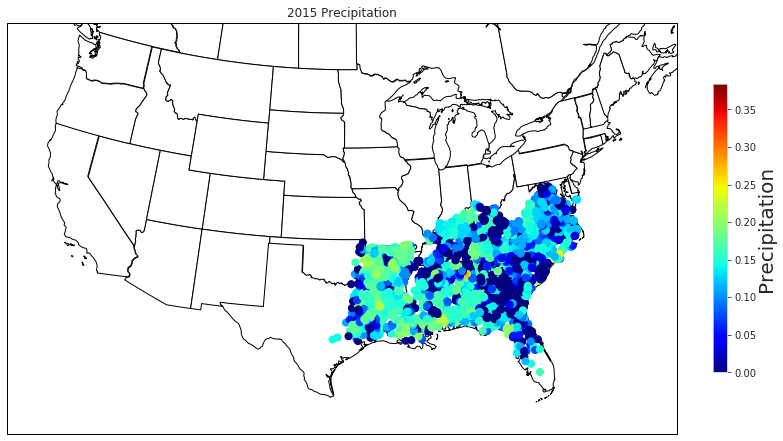

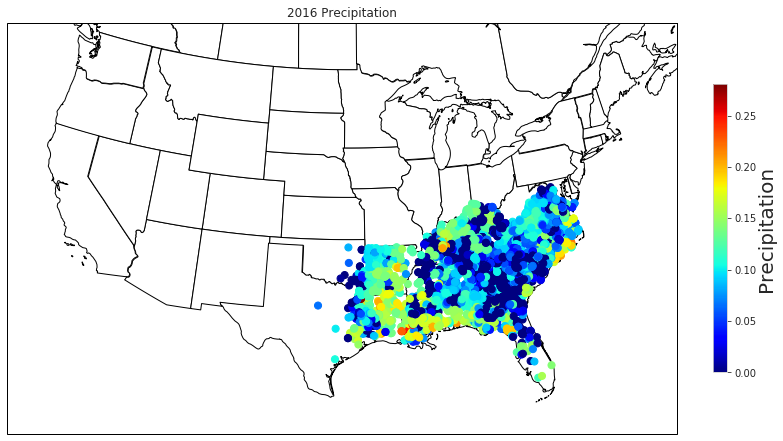

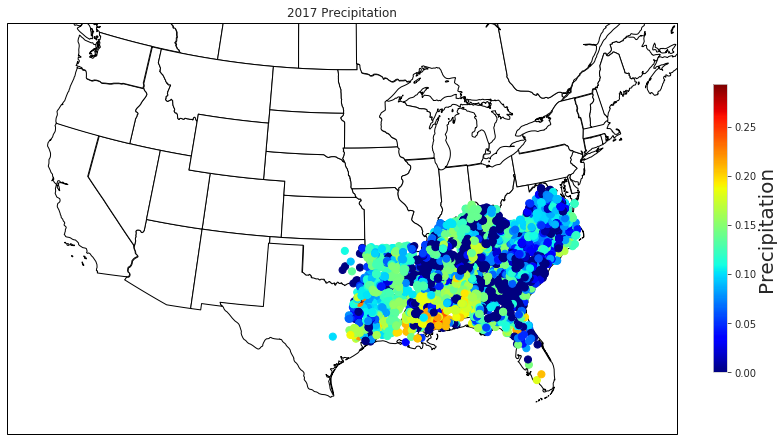

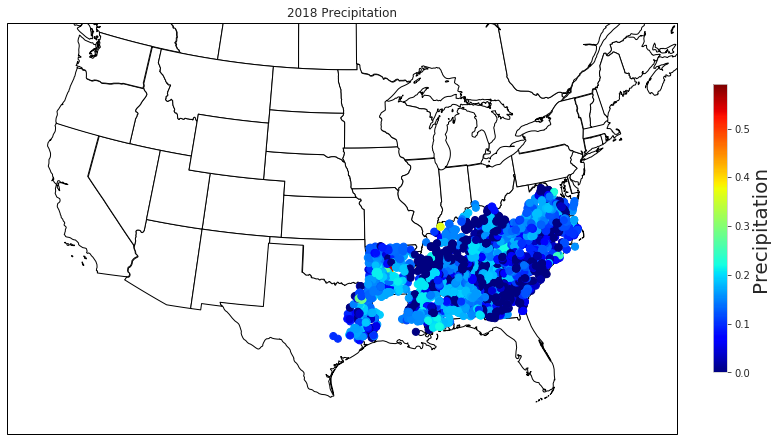

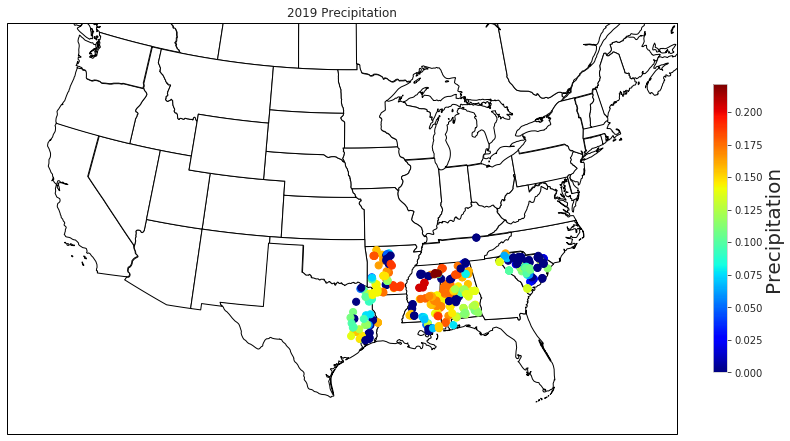

In [70]:
for i in range(20):
    mapplot()
    plt.title(str(2000+i)+' Precipitation')
    county_2000 = county.loc[county.measurement_year ==2000+i]
    plt.scatter(county_2000['longitude'],county_2000['latitude'], transform=ccrs.PlateCarree(), s=50, zorder=3, c=county_2000['mean_prcp'], cmap='jet')
    cbar = plt.colorbar(fraction = 0.02)
    cbar.set_label("Precipitation", labelpad=+1, fontsize = 20)